In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3963,3274-NSDWE,Female,0,No,No,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,1441.65,No
76,6416-JNVRK,Female,0,No,No,46,Yes,No,DSL,No,...,No,No,No,Yes,One year,No,Credit card (automatic),55.65,2688.85,No
1117,6900-RBKER,Male,0,No,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),89.45,4577.75,No
4147,3836-FZSDJ,Male,1,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901,No
1083,9878-TNQGW,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.95,171.15,Yes


In [10]:
#Data Exploration
df = df.drop(df.columns[2], axis=1)
df.dtypes


customerID           object
gender               object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#Totalcharges need to be a number
pd.to_numeric(df.TotalCharges, errors='coerce').isnull( )  #some numbers have spaces 

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull( )] #all these rows show no data in the total charges column

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#HOW TO LOOK FOR A SPECIFIC ROW= df.iloc[insert row #]-->pulls up all the data in that row
#can even add another set of brackets next to it to be even more specific

#DROP BLANK ROWS
pd.to_numeric(df.TotalCharges, errors='coerce').isnull( )

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df1 = df[df.TotalCharges !=' ']
df1.shape
df1.dtypes

customerID           object
gender               object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
#check data again-connect it and make the data type go from object to float
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

/var/folders/2p/8hsxz_394v75k3z95r9qbq7r0000gn/T/ipykernel_36291/3235005528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

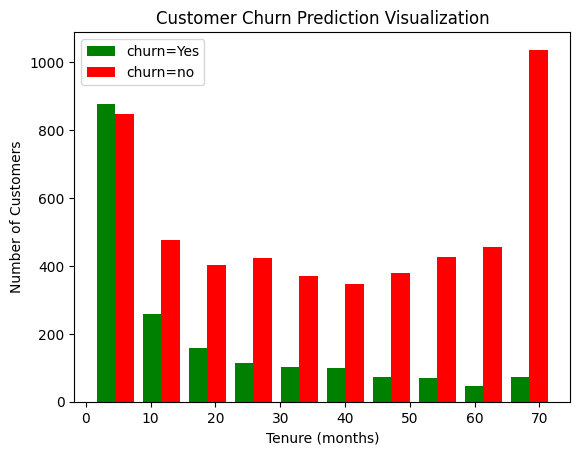

In [16]:
#Visualization
#customers living are loyal-->shown with a hystogram
tenure_churn_no= df1[df1.Churn =='No'].tenure
tenure_churn_yes= df1[df1.Churn =='Yes'].tenure

plt.hist(([tenure_churn_yes,tenure_churn_no]), color=['green','red'], label=['churn=Yes', 'churn=no'])
plt.legend()
plt.ylabel("Number of Customers")
plt.xlabel("Tenure (months)")
plt.title("Customer Churn Prediction Visualization")

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

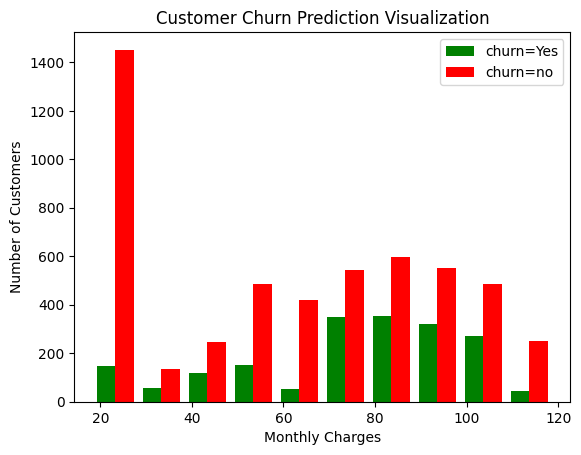

In [17]:
#check monthly charges
MC_churn_no= df1[df1.Churn =='No'].MonthlyCharges
MC_churn_yes= df1[df1.Churn =='Yes'].MonthlyCharges

plt.hist(([MC_churn_yes,MC_churn_no]), color=['green','red'], label=['churn=Yes', 'churn=no'])
plt.legend()
plt.ylabel("Number of Customers")
plt.xlabel("Monthly Charges")
plt.title("Customer Churn Prediction Visualization")

#conclusion: more customers are leaving than coming bc the red bars are higher than the green bars

In [18]:
#.unique to show all the unique values in the column ()
for column in df:
    if df[column].dtypes=="object" :
     
     #"'no internet/phone service' needs to be switched with 'No'" --> REPLACE FUNCTION
     df1[column] = df1[column].replace({'No internet service': 'No', 'No phone service': 'No'})
     print(f'{column}: {df[column].unique()}')
     



#check it


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


/var/folders/2p/8hsxz_394v75k3z95r9qbq7r0000gn/T/ipykernel_36291/1541810019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].replace({'No internet service': 'No', 'No phone service': 'No'})


In [19]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']
for col in yes_no_columns: 
    df1[col].replace({'Yes':1, 'No': 0},inplace=True)

/var/folders/2p/8hsxz_394v75k3z95r9qbq7r0000gn/T/ipykernel_36291/3714196857.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No': 0},inplace=True)
/var/folders/2p/8hsxz_394v75k3z95r9qbq7r0000gn/T/ipykernel_36291/3714196857.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [20]:
#SEE CHANGES
for col in df1:
    print(f'{column}: {df[col].unique()}')

Churn: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Churn: ['Female' 'Male']
Churn: ['Yes' 'No']
Churn: ['No' 'Yes']
Churn: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Churn: ['No' 'Yes']
Churn: ['No phone service' 'No' 'Yes']
Churn: ['DSL' 'Fiber optic' 'No']
Churn: ['No' 'Yes' 'No internet service']
Churn: ['Yes' 'No' 'No internet service']
Churn: ['No' 'Yes' 'No internet service']
Churn: ['No' 'Yes' 'No internet service']
Churn: ['No' 'Yes' 'No internet service']
Churn: ['No' 'Yes' 'No internet service']
Churn: ['Month-to-month' 'One year' 'Two year']
Churn: ['Yes' 'No']
Churn: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn: ['29.85' '1889.5' '108.15' ... '346.45' '306.

In [21]:
#CHANGE FEMALE AND MALE AS WELL
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)
df1['gender'].unique()

/var/folders/2p/8hsxz_394v75k3z95r9qbq7r0000gn/T/ipykernel_36291/1728063482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)
/var/folders/2p/8hsxz_394v75k3z95r9qbq7r0000gn/T/ipykernel_36291/1728063482.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

array([1, 0])

In [22]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'], dtype='int8')



In [23]:
# FIX THE SCALING
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

# see what happened
print(df2.columns)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [24]:
#Train and Test Split
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [25]:
x_train.shape

(5625, 26)

In [26]:
x_test.shape

(1407, 26)

In [27]:
len(x_train.columns)

26

In [28]:
print(df2.dtypes)

customerID                                  object
gender                                       int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           int8
InternetService_Fiber optic                   int8
InternetService_No             

In [29]:
#Don't want Float64
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')
df2.dropna(inplace=True)
from sklearn.model_selection import train_test_split
x = df2.drop(['Churn', 'customerID'], axis='columns')  # Dropping 'customerID' if it's not needed
y = df2['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [30]:
#Creating the model

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(25,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5) 


Epoch 1/5


/Users/leahradcliffe/Desktop/DataCurning/enviornment/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.6875 - loss: 0.5767
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.7900 - loss: 0.4363
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.7877 - loss: 0.4332
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8072 - loss: 0.4081
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8059 - loss: 0.4127


In [31]:
#Evaluate
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7852 - loss: 0.4372


[0.4453321397304535, 0.7803837656974792]

In [32]:
yp= model.predict(x_test)
yp [:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


array([[0.22617581],
       [0.38875112],
       [0.01152878],
       [0.7677006 ],
       [0.42733902]], dtype=float32)

In [33]:
y_test [:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [34]:
# Convert numbers to zero or 1
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
# Test new conditions and it is correct!
y_pred [:5]

[0, 0, 0, 1, 0]

Text(95.72222222222221, 0.5, 'truth')

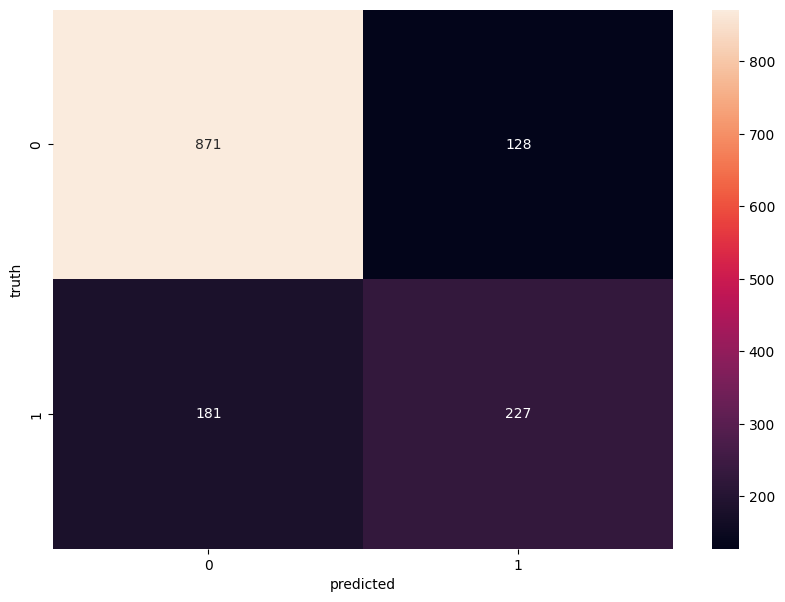

In [36]:
#Print classification report gives insight of prices and recall
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred)

plt.figure(figsize= (10,7))
sn.heatmap (cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [37]:
#Test for Accuracy
round((892+197)/(862+197+211+107),2) #79% Accurate

0.79

In [38]:
#Precision for 0 class - Precidion for customers who did not churn
round(892/(892+179),2)

0.83

In [39]:
#Precision for 1 class - Precision for customers who actually churn
round(211/(211+107),2)

0.66

In [40]:
#Measuring Recall 
#Recall for the 0 class
round(892/(892+107),2)

0.89

In [41]:
#Recall for the 1 class
round(211/(211+197),2)

0.52

In [42]:
#FINAL REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import classification_report

# Assuming you have your true labels and predicted labels
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.56      0.60       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.56      0.60       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407

